In [1]:
# Loading boston housing data set
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
# dataframe input

df_bos = pd.DataFrame(boston.data)
df_bos.columns = boston.feature_names

#dataframe output

df_bos_price = pd.DataFrame(boston.target)
df_bos_price.columns = ['Price']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


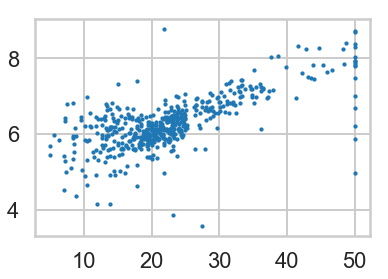

In [6]:
plt.scatter(df_bos_price, df_bos.RM, s = 5)
# plt.plot(df_bos_price, df_bos.RM)
plt.show()

# Via Sklean - Enacapsulating Predict & Fit Function

In [7]:
# Splitting of training test data
X_Train, X_Test, Y_Train, Y_test = train_test_split(df_bos.RM, df_bos_price, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
import numpy as np
X_Train = np.array(X_Train).reshape(-1, 1)
lr.fit(X_Train, Y_Train) # Fitting Data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
X_Test = np.array(X_Test).reshape(-1, 1)
Y_Pred = lr.predict(X_Test) # Predicting Data

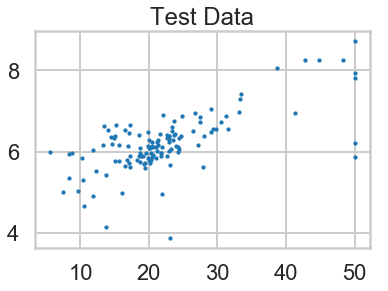

In [12]:
plt.scatter(Y_test, X_Test, s = 5)
# plt.plot(df_bos_price, df_bos.RM)
plt.title("Test Data")
plt.show()


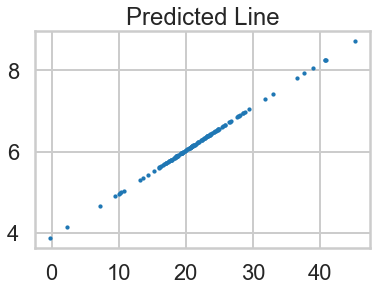

In [13]:
plt.scatter(Y_Pred, X_Test, s = 5)
# plt.plot(df_bos_price, df_bos.RM)
plt.title("Predicted Line")
plt.show()

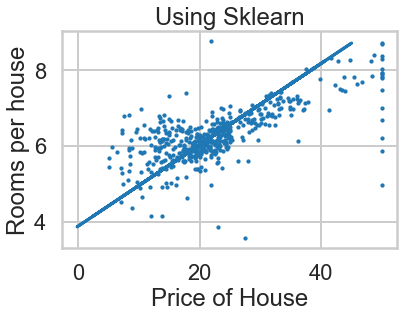

In [14]:
plt.scatter(df_bos_price, df_bos.RM, s = 5)
plt.plot(Y_Pred, X_Test)
plt.xlabel("Price of House")
plt.ylabel("Rooms per house")
plt.title("Using Sklearn")
plt.show()

# Via Equations - Working behind fit & predict function in Linear Regression

In [15]:
# now via Maths Equations - Fitting Parameters with dataset

# h = theta0 + theta1 * x_train

#initalize parameters Q
n = 1
Qo = np.zeros((n,1)) # shape of Q should be number of features n x 1
Q1 = np.zeros((n,1)) # shape of Q should be number of features n x 1

In [16]:
#Splitting of dataset
X_Train, X_Test, Y_Train, Y_test = train_test_split(df_bos.RM, df_bos_price, test_size = 0.25, random_state = 0)

In [17]:
X_Train = np.array(X_Train).reshape(-1, 1)
Y_Train = np.array(Y_Train).reshape(-1, 1)
Xo = np.ones(X_Train.shape) # Best Practice


In [18]:
epochs = 50000 # number of iterations over dataset
epoch = 0
lr = 0.01 # learning rate

In [19]:
# Fit Function
while(epoch < epochs):
    y = Qo*(Xo.T) + Q1*(X_Train.T) # Hypothesis
    err = y - Y_Train.T
    # print(err) # You can check the error while computing
    mse = np.sum(err**2)/(2*Y_Train.shape[1])
    # print(mse) # Mean Square error
    Qo = Qo - lr*np.sum(err.T*(Xo)) / Y_Train.T.shape[1] # Gradient Descent - Fitting parameters
    Q1 = Q1 - lr*np.sum(err.T*(X_Train)) / Y_Train.T.shape[1] # Gradient Descent - Fitting Parameters
    epoch +=1
    # print(epoch)

    

In [20]:
X_Test = np.array(X_Test).reshape(-1, 1) # reshaping

In [22]:
Xi = np.ones(X_Test.shape)

In [23]:
# Predict Function
Y_Pred_Test = Qo*Xi.T + Q1*X_Test.T # Predicting - Similar to Predict Function

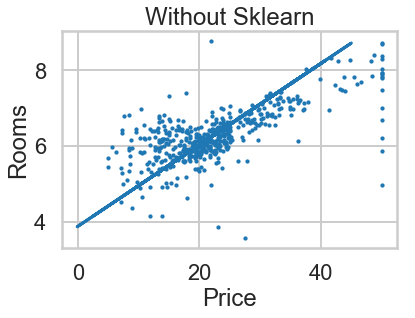

In [25]:
plt.scatter(df_bos_price, df_bos.RM, s = 5)
plt.plot(Y_Pred_Test.T, X_Test)
plt.xlabel("Price")
plt.ylabel("Rooms")
plt.title("Without Sklearn")
plt.show()